# Descenso de Gradiente

### Machine Learning


#### Andrea Jiménez Zúñiga


#### 13-10-2020

## Introducción

El objetivo de la práctica es crear funciones que me permitan calcular el descenso de gradiente, sin utilizar las librerías y funciones ya existentes. Para llevarlo a cabo, he creado un kernel desde la consola para poder programar el descenso del gradiente en Python en base al archivo de datos llamado 4_1_data. 

## Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

## Lectura de datos

Los datos son obtenidos del archivo ./4_1_data.csv. Se trata de un DataFrame de 100 observaciones, procedentes de las notas que han sacado antiguos alumnos en dos examenes (score-1 y score-2) y si finalmente han sido admitidos o no (esto se recoge con la variable label, tomando el valor de 1 si han sido admitidos y 0 si no lo han sido).

Para ello voy a importar los datos. Una vez importados le voy a dar los valores a X e y.
X recoge los datos de las columnas score-1 y score-2, mientras que la y recoge los datos de la columna llamada label.

In [2]:
datos = pd.read_csv('/Users/Andy/Desktop/CUNEF/MACHINE LEARNIG /Lab2/Lab2/data/4_1_data.csv')
datos

,score-1,score-2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


Para poder seleccionar las filas y columnas que quiero para cada variable utilizo la función *iloc* de pandas. 


In [15]:
X = datos.iloc[:,:-1].values #Selecciono todas las filas y las dos primeras columnas 
y = datos.iloc[:,-1].values #selecciono todas las filas y la última columna.

## Representación de los datos

Represento los datos para poder visualizarlos gráficamente. Se representan las variables independientes y se identifican las distintas clases para poder observar su relación. Para ello, es necesario diferenciar entre x1 y x2 que son las que representan los que han sido admitidos y los que no, por lo que se crean dos variables _pos_ y _neg_, representando _pos_ aquellos que han sido admitidos y _neg_ los que no. Se representan de distintos colores y forma, utilizando el rojo y + para los admitidos y el azul y o para los que no. 

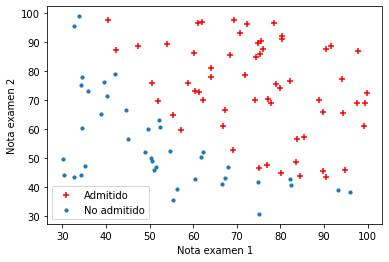

In [16]:
pos , neg = (y==1).reshape(100,1) , (y==0).reshape(100,1) #Forma de array con 100 filas y en cada una con 1 dato.
#Le doy el valor de pos (positivo) a todos aquellos cuya y sea igual a 1 y neg(negativos) a aquellos cuya y sea igual a 0.
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+") #Me da los valores de la columna 0 para todas las filas que representan positivos. 
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10) #Me da los valores de la columna 0 para todas las filas que representan negativos. 

#Le pongo el nombre a cada eje y a la leyenda: 
plt.xlabel("Nota examen 1") 
plt.ylabel("Nota examen 2")
plt.legend(["Admitido","No admitido"],loc=0)

Se puede observar que los estudiantes con las mejores notas en ambos examenes fueron admitidos en la universidad.

## Función Sigmoide

La función sigmoide es una regresión logística donde la variable dependiente es categórica. Una de las propiedades especiales que tiene esta función es que estira los valores centrales hacia el extremo para que se nos haga más fácil la predicción. 

La y va a estar siempre entre 0 y 1. 

La función sigmoide es la siguiente: 


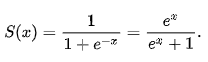

Para introducirlo en el código, primero voy a crear la función sigmoide de tal forma que me devuelva el sigmoide de z. 


In [17]:
def sigmoid(z) : 
    
    return 1/(1+np.exp(-z)) # Me devuelve la funcion sigmoide

Voy a probar que funciona la función sigmoide

In [18]:
sigmoid(0)

0.5

## Cost Function y Gradiente

Lo que se busca es que dado un x y una y encontrar una predicción de y (y hat) tal que esa predicción provenga de la prob de que y = 1 dado ese valor de x. 

Queremos que las predicciones se queden lo más cerca posible de los valores reales, por lo que quiero minimizar el error ( esto es igual a la diferencia entre el valor real y el error en valor absoluto). Para no tener que usar la función valor absoluto se utiliza la función cuadrática (elevándolo al cuadrado), otra forma es utilizando logaritmos. 

Todo logaritmo tiene una función de pérdida, porque así puedes meter tus propias funciones de coste. Las funciones de coste se pueden diseñar de muchas formas:

Loss function es una función que nos da el coste asociado con el modelo y mide cómo de bien lo está haciendo nuestro modelo en el training data. 

                           Loss error function = ℓ(y,ŷ )=−(ylog(ŷ )+(1−y)log(1−ŷ)


Por ejemplo: voy a suponer que mi valor real (y) es un 0 y que la predicción es 1, es decir que he acertado la predicción. Siempre que mi predicción sea 1 se me anula ylog(yhat), luego al hacer el log (1 -yhat) es el log(1-1) = log(0) y eso es igual a infinito, por lo que el coste se dispara. Luego el (1 – y) se queda en 0 por lo que me anula todo. Por lo que si yo acierto el error es 0.

Quiero minimizar mi coste, por lo que necesito saber cual es mi siguiente step o theta. Como quiero minimizar la función de coste, quiero que esté lo más cercano a 0 posible. Con la derivada parcial se puede encontrar el Theta para mi siguiente iteración. 

La función de coste es la siguiente:

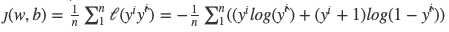

El gradiente es una medida que mide cómo de pronunciada está la pendiente. Técnicamente cuando sumamos todas las primeras derivadas de todas las variables en una función, nos da el gradiente. 

La función es la siguiente:

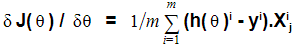

In [19]:
def costFunction(theta, X, y): # Coge theta, X e y y me devuelve la regresion logistica de la funcion coste y el gradiente 
   
    m=len(y)
    
    predictions = sigmoid(np.dot(X,theta)) # Pongo np.dot ya que X y theta son vectores.
    # Predictions corresponde con ŷ de la fórmula Loss error function.
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions)) #Esta es la formula de Loss error function.

    cost = 1/m * sum(error) # Esta es la funcion de coste 
    
    grad = 1/m * np.dot(X.transpose(),(predictions - y)) # Esta es la funcion de gradiente 
    
    return cost[0] , grad

- theta es un vector de coeficientes.
- X es el vector de fila.
- Y es un vector.

Se ha creado la función costFunction de tal forma que me calcule el coste para un determinado X e y. 


## Feature scaling


La normalización consiste en transformar los datos de tal forma que todos los predictores estén aproximadamente en la misma escala. 

Si normalizamos la magnitud del gradiente en cada step o paso del descenso de gradiente, entonces la longitud de cada step es igual al valor de nuestra tasa de aprendizaje (α). Debido a esto, la tasa de aprendizaje se ajusta a sí misma en cada step basado en la magnitud del gradiente, para asegurar que la longitud de cada step es α. 

La función de normalización que se utiliza es la siguiente:

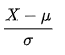

In [20]:
def featureNormalization(X): #Coge un array de X valores y me devuelve valores normalizados de X, 
    # la media y la desviacion estandar de cada uno. 
   
    mean=np.mean(X,axis=0) #media de x 
    std=np.std(X,axis=0) #Desviacion estandar de x 
    
    X_norm = (X - mean)/std #Funcion de la normalizacion
    
    return X_norm , mean , std

In [21]:
m , n = X.shape[0], X.shape[1] # m es la longitud de la primera columna y n es lo mismo pero de la segunda columna 

X, X_mean, X_std = featureNormalization(X) #Aplico la funcion que he creado anteriormente 

X= np.append(np.ones((m,1)),X,axis=1) # Añado unos en cada fila de la columna X
y=y.reshape(m,1) #Forma de array con m filas y en cada una con 1 dato.

initial_theta = np.zeros((n+1,1)) #Le doy el valor de 0 a mi theta inicial, para ello se usa la funcion np.zeros
cost, grad= costFunction(initial_theta,X,y) #Me da el coste y gradiente a partir de la funcion de coste para ese theta inicial, X e y

#Voy a hacer un print para que me de el coste del thete inical y otro print que me de el gradiente para mi theta inicial.
print("Cost of initial theta is",cost)
print("Gradient at initial theta (zeros):",grad)

Cost of initial theta is 0.693147180559946
Gradient at initial theta (zeros): [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


Se puede observar que el coste del theta inicial es de 0.69.

## Función de descenso de gradiente

Para optimizar parámetros necesitamos disminuir los errores. El objetivo del descenso de gradiente es alcanzar cada mínimo local. Se consigue mediante un proceso iterativo calculando el tamaño del step para cada iteración. Este cálculo iterativo del tamaño del step para alcanzar el mínimo local es conocido como descenso. 

La fórmula de descenso de gradiente es la siguiente: 


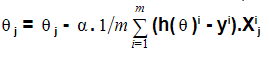

Donde α representa la tasa de aprendizaje. Se puede ver que α influye bastante en el tamaño del step ya que se multiplica el gradiente por el alpha para cada iteración.

Lo que diferencia el descenso de gradiente de una regresión lineal es que en descenso de gradiente la hipótesis es ahora la función sigmoide.

In [22]:
def gradientDescent(X,y,theta,alpha,num_iters): #Coge un array de X, y, theta, alpha y num_iters, de tal forma
    # que se actualice theta cogiendo num_iters con la tasa de aprendizaje de alpha. 
    # Me devuelve theta y la lista del coste de theta durante cada iteracion.
   
    
    m=len(y) #m es la longitud de y
    J_history =[] # para que este entre corchetes el resultado
    
    for i in range(num_iters): #Hago un for para el rango del numero de iteraciones de tal forma que
        # el coste y el gradiente sea la funcion de coste de theta, X e y.
        cost, grad = costFunction(theta,X,y)
        theta = theta - (alpha * grad) #Formula para sacar el theta 
        J_history.append(cost) #hago un append para añadir en J_history los valores que salgan en cost 
    
    return theta , J_history #Theta y lista del coste de theta durante cada iteracion.



A continuación, voy a calcular el theta y la lista del coste de theta durante cada iteración. Para ello le doy valores a alpha y a las iteraciones siendo el más óptimo: 

- alpha = 1
- num_iters = 400

In [26]:
theta , J_history = gradientDescent(X,y,initial_theta,1,400)

Hago un print para que me de el theta optimizado mediante descenso de gradiente y otro print que me de el coste de ese theta optimizado.

In [27]:
print("Theta optimized by gradient descent:",theta)
print("The cost of the optimized theta:",J_history[-1]) #Pongo -1 para que me de el valor del último theta que se encuentra en J_history


Theta optimized by gradient descent: [[1.65947664]
 [3.8670477 ]
 [3.60347302]]
The cost of the optimized theta: 0.2036004424915611


Usando este alpha y número de iteraciones, el theta optimizado es: [1.65947664], [3.8670477 ], [3.60347302] y el coste resultante es 0.20360.  

## Gráfica de la Función de Coste

A continuación, represento J_history (que me muestra los valores del coste de theta para cada iteración). 

Se puede observar que en este caso la caida es más pronunciada y la función de coste se aplana cerca de las 150 iteraciones. 

Text(0.5, 1.0, 'Cost function using Gradient Descent')

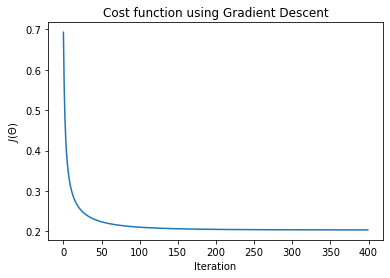

In [30]:
plt.plot(J_history) #Hago el plot de J_history
plt.xlabel("Iteration") #Nombre del eje de la x
plt.ylabel("$J(\Theta)$") #Nombre del eje de la y 
plt.title("Cost function using Gradient Descent") #Nombre de la gráfica

En la gráfica se puede observar que inicialmente el error se reduce de forma significativa. Sin embargo, conforme van aumentando las iteraciones, no se observa que se reduzca mucho el error, es decir, estabiliza a partir de un cierto valor.

Cuando empieza a alcanzar el mínimo local, empieza a tomar pasos muy pequeños hacia él de forma que no lo pase. Sin embargo, para reducir el tiempo de computación cuando está lejos, se tienen que tomar pasos más grandes para alcanzar el mínimo local más rápido. 



## Plotting the decision boundary

Para poder graficarlo, se utiliza el theta optimizado. 

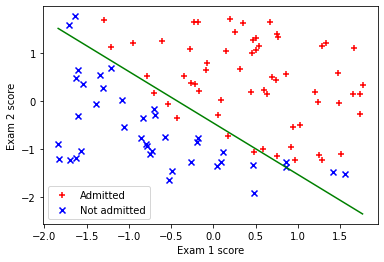

In [519]:
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted") #Me da los valores de la columna 0 para todas 
# las filas que son positivos, tanto del score-1 como del score-2. Los voy a llamar "Admitted"

plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")#Me da los valores de la columna 0 para todas 
# las filas que son negativos, tanto del score-1 como del score-2. Los voy a llamar "not admitted"

x_value= np.array([np.min(X[:,1]),np.max(X[:,1])]) # el x-value representa un array con el valor mínimo y máximo de X del 
# score-1 y del score-2.
y_value=-(theta[0] +theta[1]*x_value)/theta[2] # valor de la y_value

plt.plot(x_value,y_value, "g") # La linea toma los valores de x_value e y_value y esta representada en verde.
plt.xlabel("Exam 1 score") #Nombre del eje de la x
plt.ylabel("Exam 2 score") #Nombre del eje de la y
plt.legend(loc=0) #loc=0 es la posicion de la leyenda en el grafico

## Predicción

Una vez realizado el modelo, voy a hacer una predicción para el training del dataset para tener una idea de como de bien ha aprendido a dividir el espacio del training dataset y asignar labels. 

Va a generar una predicción para cada ejemplo que haga.

Para ello, voy a crear una función llamada _classifierPredict_, la cual va a coger en un array de numpy theta y X y predice la clase. Me va a devolver aquellas predicciones que sean mayores que 0, por lo que va a ser de tipo boolean (True/False).

In [511]:
def classifierPredict(theta,X):
    
    predictions = X.dot(theta) # Pongo np.dot ya que X y theta son vectores.
   
    return predictions>0 #Me devuelve aquellas predicciones que son mayores que 0.


- Hago un ejemplo para saber la probabilidad que tiene un estudiante de ser aceptado si sus notas son 45 y 85.

In [512]:
x_test = np.array([45,85]) # pongo en formato array los valores de la x
x_test = (x_test - X_mean)/X_std # normalizo la x_test para esos valores. La X_mean y X_std ya las defini anteriormente 
x_test = np.append(np.ones(1),x_test) #Añado unos a la x_test

prob = sigmoid(x_test.dot(theta)) #La probabilidad es la funcion sigmoide de x_test y theta 

print("For a student with scores 45 and 85, we predict an admission probability of",prob[0])


For a student with scores 45 and 85, we predict an admission probability of 0.7677628875748677


Haciendo dicha predicción, se obtiene que la probabilidad de admisión predecida es de 0.76776.

## Precisión en el training set

Puedo evaluar mis predicciones utilizando una clasificación accuracy.

In [508]:
p=classifierPredict(theta,X)

print("Train Accuracy:", sum(p==y)[0],"%") #Me suma todos los valores 
# de p (la funcion classifierPredict que me da la prediccion) que coinciden con y
# Los valores de p e y son true/false , por lo que me van a sumar todos aquellos que coincidan
# y en total hay 89, por lo que el accuracy es de 89%.


Train Accuracy: 89 %


El print realizado muestra que el _"Train Accuracy"_ es de un 89%, indicando que el _classifier_ predice el 89% del training set de forma correcta.

## Bibliografía

- Mainkar, S. (s. f.). Gradient Descent in Python - Towards Data Science. Medium. https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f

- Benlau93/Machine-Learning-by-Andrew-Ng-in-Python. (s. f.). GitHub. https://github.com/Benlau93/Machine-Learning-by-Andrew-Ng-in-Python/blob/master/LogisticRegression/ML_LogisticRegression.ipynb

- McDonald, C. (2018, 5 noviembre). Machine learning fundamentals (I): Cost functions and gradient descent. Medium. https://towardsdatascience.com/machine-learning-fundamentals-via-linear-regression-41a5d11f5220

